In [1]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N = 5 * 500 * 500

In [3]:
x = np.array(np.random.randn(N), dtype=np.float32)

## pytorch ops

In [4]:
import torch

In [9]:
%%timeit -o
Xt = torch.tensor(x).cuda()
torch.cuda.synchronize()

1.36 ms ± 48.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<TimeitResult : 1.36 ms ± 48.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>

In [10]:
pytorch = {}

In [11]:
torch_gputransfert = np.array(_.timings)

In [12]:
%%timeit -o
Xt = torch.tensor(x).cuda()
torch.cumsum(Xt, 0)
torch.cuda.synchronize()

1.44 ms ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<TimeitResult : 1.44 ms ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>

In [13]:
pytorch['cumsum'] = np.array(_.timings) - torch_gputransfert

In [14]:
%%timeit -o
Xt = torch.tensor(x).cuda()
torch.sort(Xt, 0)
torch.cuda.synchronize()

5.21 ms ± 75.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 5.21 ms ± 75.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [15]:
pytorch['sort'] = np.array(_.timings) - torch_gputransfert

## Tensorflow ops

In [16]:
X = tf.placeholder(tf.float32, shape=(None,), name=None)
Y = tf.cumsum(X)
Z = tf.nn.top_k(X, tf.shape(X)[0])
A = tf.identity(X)

config = tf.ConfigProto()
config.gpu_options.allow_growth=True

sess = tf.Session(config=config)

In [17]:
%%timeit -o
sess.run(A, feed_dict={X: x})

1.59 ms ± 44.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<TimeitResult : 1.59 ms ± 44.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>

In [18]:
tensf = {}

In [19]:
tf_gputransfert = np.array(_.timings)

In [20]:
%%timeit -o
sess.run(Y, feed_dict={X: x})

330 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 330 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [21]:
tensf['cumsum'] = np.array(_.timings) - tf_gputransfert

In [22]:
%%timeit -o
sess.run(Z, feed_dict={X: x})

10.9 ms ± 36.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 10.9 ms ± 36.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [23]:
tensf['sort'] = np.array(_.timings) - tf_gputransfert

# Summary

Text(0.5,1,'timings (1250000 pixels)')

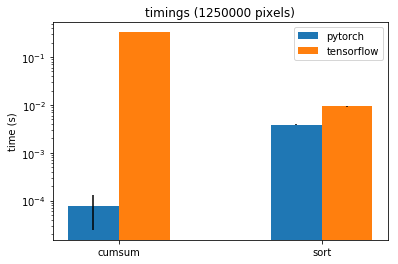

In [40]:
r = 1/2
x = np.arange(len(pytorch))
funs = pytorch.keys()

plt.bar(x - r/4, [v.mean() for v in pytorch.values()], width=r/2, yerr=[v.std() for v in pytorch.values()], label='pytorch')
plt.bar(x + r/4, [v.mean() for v in tensf.values()], width=r/2, yerr=[v.std() for v in tensf.values()], label='tensorflow')
plt.legend()
plt.gca().set_yscale('log')
plt.xticks(x, funs);
plt.ylabel('time (s)')
plt.savefig('timings.svg')
plt.title('timings ({} pixels)'.format(N))